In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading the dataset

customer_data = pd.read_csv(r'C:/Users/Rusha/OneDrive/Desktop/Python final project/Churn_Modelling.csv')
print(customer_data)

# We display the no of columns present in the existing dataset
columns = customer_data.columns.values.tolist()
print(columns)





      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [3]:

# We remove the RowNumber, CustomerId, and Surname columns from our feature set
# as they do not contribute to the churn in any way

dataset = customer_data.drop(['RowNumber','CustomerId','Surname'], axis=1)



In [4]:
# To apply machine learning algorithms we first convert categorical data to numerical data

# So isolating the two columns geography and gender

dataset =  dataset.drop(['Geography', 'Gender'], axis=1)
print(dataset)

# For the mentioned country (geography) value is set to 1 and rest value is 0

Geography = pd.get_dummies(customer_data.Geography).iloc[:,1:]

# Converting gender to Boolean

Gender = pd.get_dummies(customer_data.Gender).iloc[:,1:]
print(Gender, Geography)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  
0                  1        101348.88       1  
1                  1        112542.58       0  
2  

In [5]:
# After editing the columns we need to concatenate to the original dataset
dataset = pd.concat([dataset,Geography,Gender], axis=1)

In [7]:
# So X has our target variable and y has the remaining dataset 
# we split our training as well as test data with the ratio of 8:2

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

# importing data
customer_data = pd.read_csv('Churn_Modelling.csv')
customer_data.drop('No', inplace = True,axis=1)
  
print(customer_data.head())
print(customer_data.columns)

FileNotFoundError: [Errno 2] No such file or directory: 'Churn_Modelling.csv'

In [25]:
# On training we test the dataset and get the output

from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions )) 
print(accuracy_score(y_test, predictions ))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.73      0.51      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

0.8635


<AxesSubplot:xlabel='Age', ylabel='Exited'>

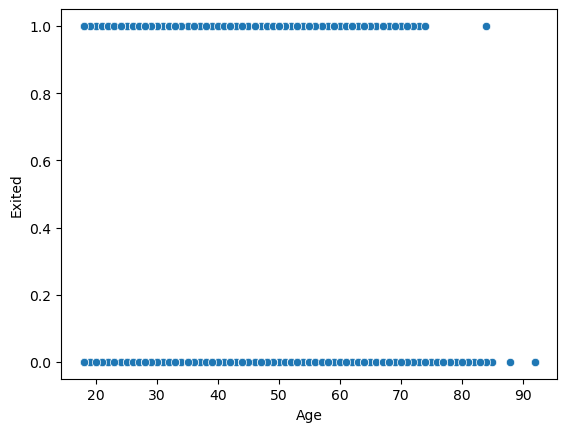

In [17]:
import seaborn as sns
sns.scatterplot(x='Age',
                y='Exited', data=dataset)

<AxesSubplot:xlabel='Age', ylabel='Exited'>

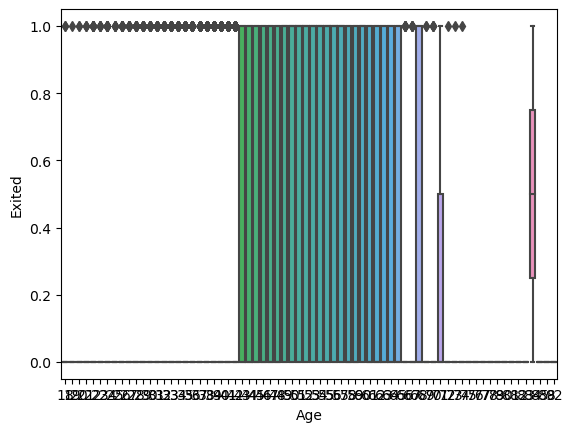

In [19]:
import seaborn as sns
sns.boxplot(x='Age',
                y='Exited', data=dataset)

<AxesSubplot:>

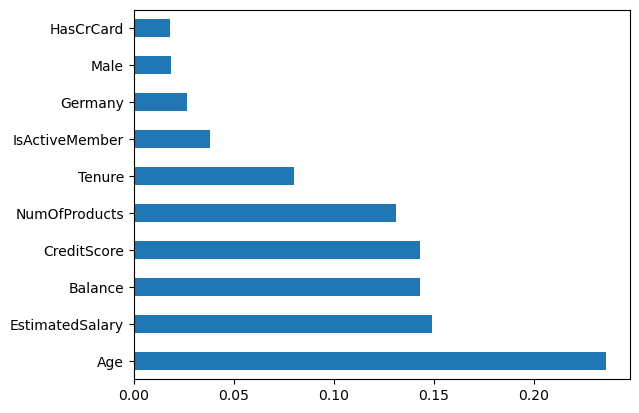

In [18]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')